# NLP02031: PyTorch Workshop
Having question about the workshop or this notebook? Contact Erfan Moosavi Monazzah (Tel: @ErfanMoosavi2000).
<br>This notebook is adapted from CS224n PyTorch Workshop
#### Plan
This notebook is an itroduction to pytorch and is a prerequisite for the workshop. We cover the following topics in this notebook:
1. Tensors
2. Vectorization
3. Indexing & Slicing
4. AutoGrad

## Introduction
PyTorch is a deep learning framework, one of the two main frameworks alongside TensorFlow.
<br>PyTorch is a popular choice among researchers and practitioners for its ease of use, flexibility, and dynamic computation graph. It allows for seamless use of GPUs, and offers extensive support for common neural network architectures and modules.

Some of PyTorch's capabilities include:
- Dynamic computation graph
- Easy debugging and visualization with tensorboard
- Distributed training on multiple GPUs and machines
- Support for various neural network architectures and modules, including convolutional and recurrent neural networks, transformers, and more.
<br> Let's start by importing PyTorch:

In [ ]:
import torch

We are all set to start our tutorial. Let's dive in!

## Tensors
**Tensors** are
- PyTorch's most basic building block.
- multi-dimensional matrices.

for example: A 256x256 image might be represented by a `3x256x256` tensor (First dimension represents color channels)
<br><font color='yellow'>Quiz: How can we represent a sentence using tensors? 🤔</font>

**Answer:**<br>


In [ ]:
list_of_lists = [
  [1, 2, 3],
  [4, 5, 6],
]
print(list_of_lists)

[[1, 2, 3], [4, 5, 6]]


In [ ]:
# Initializing a tensor
data = torch.tensor([list_of_lists])
print(data)

tensor([[[1, 2, 3],
         [4, 5, 6]]])


Each tensor has a **data type**, something like:
- `torch.float32`
- `torch.int`
<br>You can specify the data type explicitly when you create the tensor:

In [ ]:
# Notice the dots after the numbers, which specify that they're floats
data = torch.tensor([
                     [0, 1],
                     [2, 3],
                     [4, 5]
                    ], dtype=torch.float32)
print(data)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])


There are a number of utility functions to create tensors in pytorch:
- **torch**.zeros(): creates a tensor filled with zeros.
- **torch**.ones(): creates a tensor filled with ones.
- **torch**.rand(): creates a tensor filled with random values from this range [0, 1).
- **torch**.full(): creates a tensor filled with a scalar value.
- **torch**.eye(): creates a square tensor with ones on the diagonal and zeros elsewhere.
- **torch**.arange(): creates a 1D tensor with evenly spaced values in a given range, space determined by step.
- **torch**.linspace(): creates a 1D tensor with evenly spaced values between a start and end value, space determined by number of values.

In [ ]:
zeros = torch.zeros(2, 5)  # shape
ones = torch.ones(3, 4) # shape
randoms = torch.rand(2, 3) # shape
full = torch.full((3,4), 56.7) # shape, fill_value
I = torch.eye(3) # diagonal_size
arange = torch.arange(0, 10, 2) # start, stop, step
linspace = torch.linspace(0, 10, 20) # start, stop, number_of_values
empty = torch.empty(2,2) # shape: faster than zeros() or ones() because it does not init the memory it alloc

print("zeros = torch.zeros(2, 5)\n", zeros, "\n\n",
      "ones = torch.ones(3, 4)\n", ones, "\n\n",
      "randoms = torch.rand(2, 3)\n", randoms, "\n\n",
      "full = torch.full((3, 4), 56.7)\n", full, "\n\n",
      "I = torch.eye(3)\n", I, "\n\n",
      "arange = torch.arange(0, 10, 2)\n", arange, "\n\n",
      "linspace = torch.linspace(0, 10, 20)\n", linspace, "\n\n",
      "empty = torch.empty(2,2)\n", empty)


zeros = torch.zeros(2, 5)
 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) 

 ones = torch.ones(3, 4)
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

 randoms = torch.rand(2, 3)
 tensor([[0.0232, 0.8395, 0.7140],
        [0.9644, 0.4528, 0.0698]]) 

 full = torch.full((3, 4), 56.7)
 tensor([[56.7000, 56.7000, 56.7000, 56.7000],
        [56.7000, 56.7000, 56.7000, 56.7000],
        [56.7000, 56.7000, 56.7000, 56.7000]]) 

 I = torch.eye(3)
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) 

 arange = torch.arange(0, 10, 2)
 tensor([0, 2, 4, 6, 8]) 

 linspace = torch.linspace(0, 10, 20)
 tensor([ 0.0000,  0.5263,  1.0526,  1.5789,  2.1053,  2.6316,  3.1579,  3.6842,
         4.2105,  4.7368,  5.2632,  5.7895,  6.3158,  6.8421,  7.3684,  7.8947,
         8.4211,  8.9474,  9.4737, 10.0000]) 

 empty = torch.empty(2,2)
 tensor([[1.5947e-42, 4.5776e-41],
        [9.5140e-20, 3.0683e-41]])


<font color="yellow">Quiz: Under each comment write the suitable script to create the said tensor</font>
<br>$A=\begin{bmatrix} 1 & 2.2 & 9.6 \\ 4 & -7.2 & 6.3 \end{bmatrix}$
<br>$B=\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}$ (Initialize with 3 different ways?)

In [ ]:
# A
torch.set_printoptions(precision=1)

A = torch.tensor(
    [
    [1,2.2,9.6],
    [4,-7.2,6.3]
    ],dtype=torch.float32
)

print(A)

# B

B1 = torch.tensor([
                     [1, 1],
                     [1, 1]
                    ])
B2 = torch.ones(2,2)
B2_int = B2.int()
B3 = torch.full((2,2),1)
print(B1, '\n', B2_int, '\n', B3)

tensor([[ 1.0,  2.2,  9.6],
        [ 4.0, -7.2,  6.3]])
tensor([[1, 1],
        [1, 1]]) 
 tensor([[1, 1],
        [1, 1]], dtype=torch.int32) 
 tensor([[1, 1],
        [1, 1]])


In [ ]:
# Create two random tensors
A = torch.tensor([[1, 2, 3], [4, 5, 6]])
B = A.clone() # Modifiying the clone does not affect the original tensor

A_shape = A.shape # A Size object containing tensor dimentions' sizes

# Addition
C = A + B
C_torch = torch.add(A, B)

# Subtraction
D = A - B
D_torch = torch.sub(A, B)

# Multiplication (element-wise)
E = A * B
E_torch = torch.mul(A, B)

# Division (element-wise)
F = A / B
F_torch = torch.div(A, B)

# Transpose
G = A.T
G_torch = torch.transpose(A, 0, 1)

# Matrix multiplication
H = A @ B.T
H_torch = torch.matmul(A, B.T)

# Print results
print("A: \n", A)
print("B: \n", B)
print("A.shape: \n", A_shape)
print("A + B: \n", C)
print("torch.add(A, B): \n", C_torch)
print("A - B: \n", D)
print("torch.sub(A, B): \n", D_torch)
print("A * B: \n", E)
print("torch.mul(A, B): \n", E_torch)
print("A / B: \n", F)
print("torch.div(A, B): \n", F_torch)
print("Transpose of A: \n", G)
print("torch.transpose(A, 0, 1): \n", G_torch)
print("A @ B.T: \n", H)
print("torch.matmul(A, B.T): \n", H_torch)

A: 
 tensor([[1, 2, 3],
        [4, 5, 6]])
B: 
 tensor([[1, 2, 3],
        [4, 5, 6]])
A.shape: 
 torch.Size([2, 3])
A + B: 
 tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
torch.add(A, B): 
 tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
A - B: 
 tensor([[0, 0, 0],
        [0, 0, 0]])
torch.sub(A, B): 
 tensor([[0, 0, 0],
        [0, 0, 0]])
A * B: 
 tensor([[ 1,  4,  9],
        [16, 25, 36]])
torch.mul(A, B): 
 tensor([[ 1,  4,  9],
        [16, 25, 36]])
A / B: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.div(A, B): 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
Transpose of A: 
 tensor([[1, 4],
        [2, 5],
        [3, 6]])
torch.transpose(A, 0, 1): 
 tensor([[1, 4],
        [2, 5],
        [3, 6]])
A @ B.T: 
 tensor([[14, 32],
        [32, 77]])
torch.matmul(A, B.T): 
 tensor([[14, 32],
        [32, 77]])


<font color="yellow">Quiz: Considering tensor A and B, implement the following formula: </font>
<br>$((A+B)(A-B)^T)/I$
<br>$A=\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}$
<br>$B=\begin{bmatrix} 2 & 3 & 4 \\ 5 & 6 & 7 \end{bmatrix}$

In [ ]:
import torch

# Create two tensors A and B
A = torch.tensor(
    [
        [1,2,3],
        [4,5,6]
    ]
)
B = torch.tensor(
    [
        [2,3,4],
        [5,6,7]
    ]
)
print(A)
print(B)

# Perform the calculation
result = ((A+B)@((A-B).T))/torch.eye(2)

# Print the result
print(result)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[2, 3, 4],
        [5, 6, 7]])
tensor([[-15., -inf],
        [-inf, -33.]])


**Reshaping** tensors can be used to make batch operations easier (more on that later), but be careful that the data is reshaped in the order you expect:

In [ ]:
rr = torch.arange(1, 16)
print("The shape is currently", rr.shape)
print("The contents are currently", rr)
print()
rr2 = rr.view(5, 3) # view is not a clone, it uses the same shared data
print("After reshaping, the shape is currently", rr2.shape)
print("The contents are currently", rr2)
print()
print('Changing the first value of rr will change the corresponding value in rr2')
rr[0] = 100
print(rr)
print(rr2)

# what about reshape?
# read: https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch

The shape is currently torch.Size([15])
The contents are currently tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

After reshaping, the shape is currently torch.Size([5, 3])
The contents are currently tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])

Changing the first value of rr will change the corresponding value in rr2
tensor([100,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15])
tensor([[100,   2,   3],
        [  4,   5,   6],
        [  7,   8,   9],
        [ 10,  11,  12],
        [ 13,  14,  15]])


Finally, you can also inter-convert tensors with **NumPy arrays**:

In [ ]:
import numpy as np

# numpy.ndarray --> torch.Tensor: [feed ndarray to torch.tensor]
arr = np.array([[1, 0, 5]])
data = torch.tensor(arr)
print("This is a torch.tensor", data)

# torch.Tensor --> numpy.ndarray: [use .numpy() on tensor]
new_arr = data.numpy()
print("This is a np.ndarray", new_arr)

This is a torch.tensor tensor([[1, 0, 5]])
This is a np.ndarray [[1 0 5]]


## Vectorization
One of the reasons why we use **tensors** is *vectorized operations*: operations that be conducted in parallel over a particular dimension of a tensor.

In [ ]:
data = torch.arange(1, 36, dtype=torch.float32).reshape(5, 7)
print("Data is:", data)

# We can perform operations like *sum* over each row...
print("Row sum:")
print(data.sum(dim=0))

# or over each column.
print("Col sum:")
print(data.sum(dim=1))

# Other operations are available:
print("Col std:")
print(data.std(dim=1))


Data is: tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19., 20., 21.],
        [22., 23., 24., 25., 26., 27., 28.],
        [29., 30., 31., 32., 33., 34., 35.]])
Row sum:
tensor([ 75.,  80.,  85.,  90.,  95., 100., 105.])
Col sum:
tensor([ 28.,  77., 126., 175., 224.])
Col std:
tensor([2.2, 2.2, 2.2, 2.2, 2.2])


**Without specifying dimentions, it just sum all the values**

In [ ]:
data.sum()

tensor(630.)



<font color="yellow">Quiz: Write code that creates a `torch.tensor` with the following contents:
$\begin{bmatrix} 1 & 2.2 & 9.6 \\ 4 & -7.2 & 6.3 \end{bmatrix}$

Normalize the values in the tensor using Z-Score normalization. (Help: https://en.wikipedia.org/wiki/Standard_score)</font>



In [ ]:
tens = torch.tensor([[1, 2.2, 9.6], [4, -7.2, 6.3]])
tens_normalized = (tens - torch.mean(tens))/ torch.std(tens)
print(tens_normalized)

tensor([[-0.3, -0.1,  1.2],
        [ 0.2, -1.7,  0.6]])


## Indexing & Slicing

You can access arbitrary elements of a tensor using the `[]` operator.

In [ ]:
matr = torch.arange(1, 16).view(5, 3)
print(matr)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])


In [ ]:
matr[0] # first row

tensor([1, 2, 3])

In [ ]:
matr[0, :] # first row

tensor([1, 2, 3])

In [ ]:
matr[:, 0] # first col

tensor([ 1,  4,  7, 10, 13])

In [ ]:
matr[0:3] # 3 by 3 from top left

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
matr[:, 0:2] # first two cols

tensor([[ 1,  2],
        [ 4,  5],
        [ 7,  8],
        [10, 11],
        [13, 14]])

In [ ]:
matr[0:3, 0:2] # frist three rows of the first two cols

tensor([[1, 2],
        [4, 5],
        [7, 8]])

<font color="yellow">Quiz: It look likes they are doing the same thing? Can you give an example that matr[i][j] wouldn't be the same as matr[i,j]?</font>
<br>hint: You may consider i and/or j as slices not indices.

In [ ]:
print(matr[0][2])
print(matr[0,2])

tensor(3)
tensor(3)


In [ ]:
print(matr[0:2][0])
print(matr[0:2,0])

tensor([1, 2, 3])
tensor([1, 4])


Accessing python scalar value in a tensor

In [ ]:
matr[0, 0]

tensor(1)

In [ ]:
matr[0, 0].item()

1

## Autograd
Pytorch is well-known for its automatic differentiation feature. We can call the `backward()` method to ask `PyTorch` to calculate the gradients, which are then stored in the `grad` attribute.

In [ ]:
# Create an example tensor
# requires_grad parameter tells PyTorch to store gradients
x = torch.tensor([2.], requires_grad=True)

# Print the gradient if it is calculated
# Currently None since x is a scalar
print(x.grad)

None


In [ ]:
# Calculating the gradient of y with respect to x
y = x * x * 3 # 3x^2
y.backward()
print(x.grad) # d(y)/d(x) = d(3x^2)/d(x) = 6x = 12

tensor([12.])


Let's run backprop from a different tensor again to see what happens.

In [ ]:
z = x * x * 3 # 3x^2
z.backward()
print(x.grad)

tensor([24.])


We can see that the `x.grad` is updated to be the sum of the gradients calculated so far. When we run backprop in a neural network, we sum up all the gradients for a particular neuron before making an update. This is exactly what is happening here! This is also the reason why we need to run `zero_grad()` in every training iteration (more on this later). Otherwise our gradients would keep building up from one training iteration to the other, which would cause our updates to be wrong.

In [ ]:
# let's have a look at a bit more sophisticated example:
# clearing cumulative grads
print(x.grad)
x.grad.zero_()
print(x.grad)

tensor([24.])
tensor([0.])


In [ ]:
y = torch.tensor(3., requires_grad=True)
y

tensor(3., requires_grad=True)

In [ ]:
f = y * x * 10
f.backward()
print(x)
print(x.grad)
print()
print(y)
print(y.grad)

tensor([2.], requires_grad=True)
tensor([30.])

tensor(3., requires_grad=True)
tensor(20.)


In [ ]:
x.grad.zero_()
f = 3 * x
g = 10 * f
g.backward()

print(x)
print(x.grad)

tensor([2.], requires_grad=True)
tensor([30.])


To read more about auto grad:
1) https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/
2) https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html

<font color="yellow">Quiz: Draw the following functions with matplotlib.</font>
<br>$x \epsilon [-3, 3]$
1. $f(x) = \frac{1}{\sqrt{2\pi} e^{\frac{x+1}{2}}}$
2. $\frac{\partial }{\partial x} f(x)$

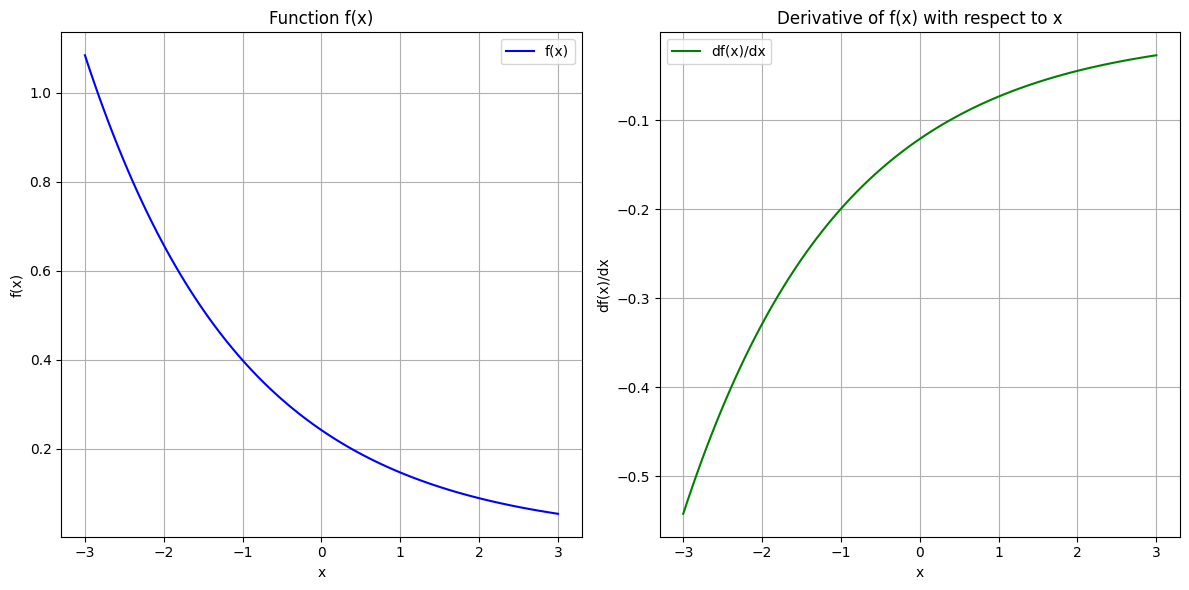

In [43]:
import matplotlib.pyplot as plt


def f(x):
    x.requires_grad = True
    return 1 / (torch.sqrt(torch.tensor(2 * torch.pi)) * torch.exp((x + 1) / 2))
x = torch.linspace(-3, 3, 100)
y = f(x)
y.sum().backward(retain_graph=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x.detach().numpy(), y.detach().numpy(), label='f(x)' , color='blue')
plt.title('Function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='df(x)/dx', color='green')
plt.title('Derivative of f(x) with respect to x')
plt.xlabel('x')
plt.ylabel('df(x)/dx')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()